In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [2]:
img_path = '../img/{}.png'

# Eigenvalues Problems

# PCA

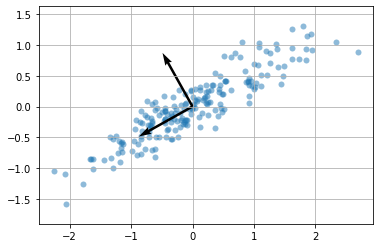

In [3]:
N = 200
x = np.random.randn(N)
y = 0.2*np.random.randn(N)
X = np.column_stack((x,y))
X = X - X.mean(axis=0)
theta = np.pi/6
R = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
X = X@R
P,S,QT = la.svd(X)
plt.scatter(X[:,0],X[:,1],alpha=0.5,lw=0)
plt.quiver(QT[0,0],QT[0,1],angles='xy',scale_units='xy',scale=1)
plt.quiver(QT[1,0],QT[1,1],angles='xy',scale_units='xy',scale=1)
plt.grid(True); plt.axis('equal');
plt.savefig(img_path.format('03_04_img01'),dpi=300)
plt.show()

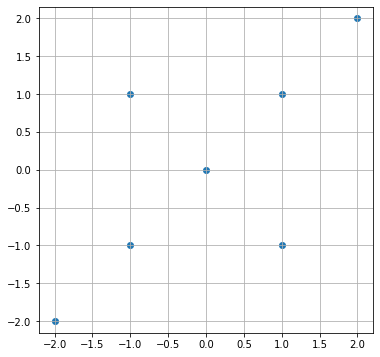

In [6]:
x = [-2,-1,-1,0,1,1,2]
y = [-2,-1,1,0,-1,1,2]
X = np.column_stack((x,y))
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],lw=0,s=50)
plt.grid(True); plt.axis('equal');
plt.savefig(img_path.format('03_04_img02'),dpi=300)
plt.show()

In [7]:
from sklearn import datasets

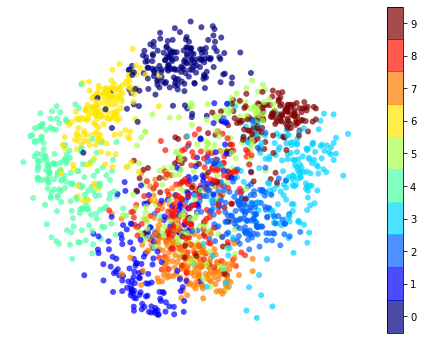

In [8]:
digits = datasets.load_digits()
D = digits['data']
X = D - D.mean(axis=0)
P,S,QT = la.svd(X)
X2d = X @ QT[0:2,:].T
plt.figure(figsize=(8,6))
plt.scatter(X2d[:,0],-X2d[:,1],c=digits['target'],cmap=plt.cm.get_cmap('jet', 10),alpha=0.7,lw=0)
plt.axis(False)
plt.colorbar(ticks=range(0,10)); plt.clim([-0.5,9.5]);
plt.savefig(img_path.format('03_04_img05'),dpi=300)
plt.show()

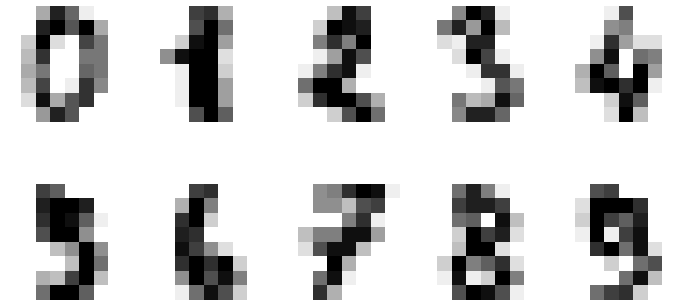

In [9]:
plt.figure(figsize=(12,6))
for n in range(0,10):
    plt.subplot(2,5,n+1)
    plt.imshow(D[n,:].reshape(8,8),cmap='binary')
    plt.axis(False)
plt.savefig(img_path.format('03_04_img03'),dpi=300)
plt.show()

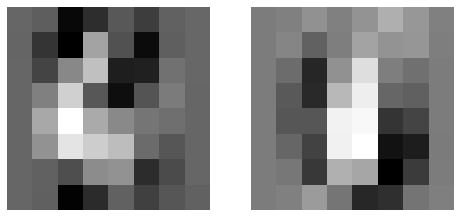

In [10]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(QT[0,:].reshape(8,8),cmap='binary')
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(-QT[1,:].reshape(8,8),cmap='binary')
plt.axis(False)
plt.savefig(img_path.format('03_04_img04'),dpi=300)
plt.show()

## Eigenvalue: EXERCISES

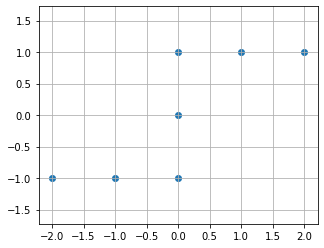

In [11]:
x = [-2,-1,0,0,0,1,2]
y = [-1,-1,1,0,-1,1,1]
X = np.column_stack((x,y))
plt.figure(figsize=(5,4))
plt.scatter(X[:,0],X[:,1],lw=0,s=50)
plt.grid(True); plt.axis('equal');
plt.savefig(img_path.format('03_04_ex01'),dpi=300)
plt.show()

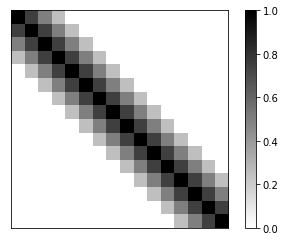

In [12]:
N = 16
c = np.zeros(N)
c[:4] = np.array([1.0,0.75,0.5,0.25])
A = la.toeplitz(c)
plt.imshow(A,cmap='binary')
plt.xticks([]); plt.yticks([]); plt.colorbar()
plt.savefig(img_path.format('03_04_img06'),dpi=300)
plt.show()

In [13]:
P,S,QT = la.svd(A)

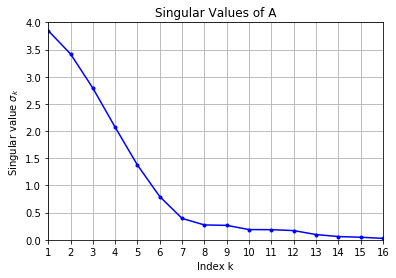

In [14]:
plt.plot(range(1,17),S,'b.-')
plt.grid(True); plt.xlim([1,16]); plt.ylim([0,4])
plt.title("Singular Values of A"); plt.xticks(range(1,17))
plt.xlabel('Index k'); plt.ylabel('Singular value $\sigma_k$');

plt.savefig(img_path.format('03_04_img07'),dpi=300)
plt.show()

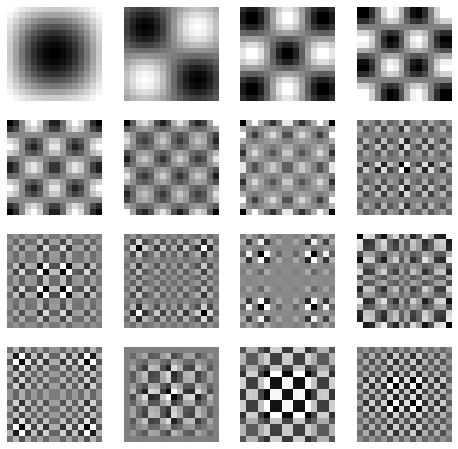

In [15]:
plt.figure(figsize=(8,8))
for n in range(0,16):
    plt.subplot(4,4,n+1)
    plt.imshow(S[n]*np.outer(P[:,n],QT[n,:]),cmap='binary')
    plt.axis(False)
plt.savefig(img_path.format('03_04_img08'),dpi=300)
plt.show()

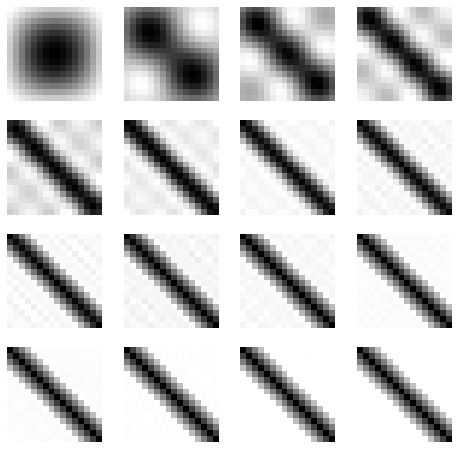

In [16]:
plt.figure(figsize=(8,8))
for n in range(0,16):
    plt.subplot(4,4,n+1)
    Ak = sum([S[n]*np.outer(P[:,n],QT[n,:]) for n in range(0,n+1)])
    plt.imshow(Ak,cmap='binary')
    plt.axis(False)
plt.savefig(img_path.format('03_04_img09'),dpi=300)
plt.show()

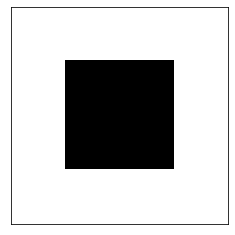

In [17]:
N = 4
Z = np.zeros((N,N))
O = np.ones((N,N))
X = np.block([[Z,Z,Z,Z],[Z,O,O,Z],[Z,O,O,Z],[Z,Z,Z,Z]])
plt.imshow(X,cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig(img_path.format('03_04_img10'),dpi=300)
plt.show()

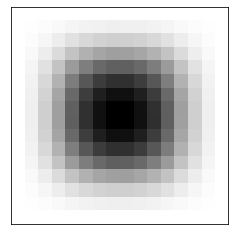

In [18]:
B = A @ X @ A + 0.01*np.random.random((16,16))
plt.imshow(B,cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig(img_path.format('03_04_img11'),dpi=300)
plt.show()

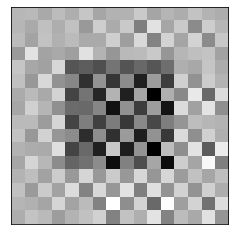

In [19]:
X1 = la.solve(A,B)
X2 = la.solve(A,X1.T)
plt.imshow(X2,cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig(img_path.format('03_04_img12'),dpi=300)
plt.show()

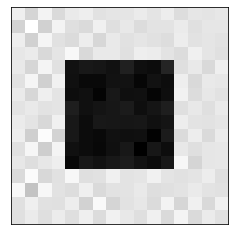

In [20]:
k = 12
Ak_plus = sum([1/S[n]*np.outer(QT[n,:].T,P[:,n].T) for n in range(0,k+1)])
X3 = Ak_plus @ B @ Ak_plus
plt.imshow(X3,cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig(img_path.format('03_04_img13'),dpi=300)
plt.show()